<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_ppo_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,788 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,684 kB]
Get:13 http://archive.ubuntu.com/ubuntu jamm

In [1]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [2]:

#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [3]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [4]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


In [5]:
#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib protobuf==3.20.3

  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5 MB)
Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64

In [6]:
#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas

In [7]:
#RAPIDS Python Libraries
!pip install numba==0.61.0

  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.4 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompat

In [8]:
#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [9]:
#Check Library Versions (for debugging)
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#Version Check
print("Library Versions")
print("--------------------")
print(f"PyTorch: {torch.__version__}")
print(f"CUDA: {torch.version.cuda}")
print(f"cuDF: {cudf.__version__}")
print(f"cuML: {cuml.__version__}")
print(f"Dask: {dask.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"LightGBM: {lgb.__version__}")
print(f"Gymnasium: {gym.__version__}")
print(f"Stable Baselines3: {stable_baselines3.__version__}")


Library Versions
--------------------
PyTorch: 2.6.0+cu124
CUDA: 12.4
cuDF: 25.02.00
cuML: 25.02.00
Dask: 2024.12.1
Pandas: 2.2.3
NumPy: 2.0.2
SciPy: 1.15.2
LightGBM: 4.5.0
Gymnasium: 1.1.1
Stable Baselines3: 2.6.0


In [10]:
#Check GPU and CUDA Configuration
import torch
print("\nGPU Availability")
print("--------------------")
print(f"PyTorch GPU Available: {torch.cuda.is_available()}")
print(f"GPU Count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

#Check NVIDIA CUDA Configuration
!nvidia-smi
!nvcc --version



GPU Availability
--------------------
PyTorch GPU Available: True
GPU Count: 1
 GPU Name: Tesla T4
Sun Mar 30 20:01:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                       

In [11]:
#Core Libraries
import os
import gc
import numpy as np
import pandas as pd
import cudf
import cuml
import cupy as cp
import yfinance as yf
import matplotlib.pyplot as plt

#Machine Learning Libraries
import xgboost as xgb
from cuml.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Reinforcement Learning
import gymnasium as gym
import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv


In [28]:
#Step 1: Import Libraries and Mount Google Drive
import os
from google.colab import drive
import pandas as pd
import numpy as np
import yfinance as yf
import gymnasium as gym
import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

drive.mount('/content/drive')

#Step 2: Download and Clean Data
def clean_stock_data(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    df.rename(columns=lambda x: x.capitalize(), inplace=True)
    df.rename(columns={'Datetime': 'Datetime', 'Adjclose': 'Close'}, inplace=True)

    required_columns = ['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = df[[col for col in required_columns if col in df.columns]]

    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
    df.dropna(subset=['Datetime', 'Close'], inplace=True)
    df.sort_values(by='Datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

df = yf.download("TSLA", period="720d", interval="1h")
df.reset_index(inplace=True)
df = clean_stock_data(df)

#Step 3: Compute Technical Indicators
def compute_technical_indicators(df):
    df['ATR'] = (df['High'] - df['Low']).rolling(window=14).mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    macd_fast = df['Close'].ewm(span=12).mean()
    macd_slow = df['Close'].ewm(span=26).mean()
    df['MACD_Line'] = macd_fast - macd_slow
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']

    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(window=14).mean()
    loss = -delta.clip(upper=0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df['Volume_Avg'] = df['Volume'].rolling(window=20).mean()
    df['ADX'] = abs(df['High'] - df['Low']).rolling(window=14).mean()

    df.dropna(inplace=True)

    return df

df = compute_technical_indicators(df)

#Step 4: Generate Trading Signals
def generate_trade_signals(df):
    df['Buy_Signal'] = np.where(
        (df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
        ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
        (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18),
        1, 0
    )

    df['Sell_Signal'] = np.where(
        ((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
        ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
        (df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20),
        1, 0
    )

    return df

df = generate_trade_signals(df)

#Step 5: Add Future Labels
df['Future_Close'] = df['Close'].shift(-10)
df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
df['Target'] = np.select(
    [df['Return'] > 0.02, df['Return'] < -0.02],
    [1, -1], default=0
)
df.dropna(inplace=True)

#Custom Environment with Reward Adjustment
class CustomStocksEnv(gym_anytrading.envs.StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)

    def step(self, action):
        obs, reward, done, info = super().step(action)

        terminated = done
        truncated = False

        # Adjust reward
        if info['total_profit'] < 0.95:
            reward -= 5
        else:
            reward += info['total_profit']

        obs = np.array(obs, dtype=np.float32)
        return obs, reward, terminated, truncated, info

    def reset(self, seed=None, options=None):
        obs = super().reset()
        obs = np.array(obs, dtype=np.float32)
        return obs, {}



#Step 6: Define Original Stable Environment and Train PPO (Extended Training)
frame_bound = (50, len(df))
window_size = 10

# Original stable environment
env = gym.make('stocks-v0', df=df, frame_bound=frame_bound, window_size=window_size)
env = DummyVecEnv([lambda: env])

ppo_model = PPO(
    "MlpPolicy",
    env,
    learning_rate=1e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.995,
    ent_coef=0.005,
    verbose=1,
    device='cpu'  # PPO is efficient on CPU
)

ppo_model.learn(total_timesteps=1_000_000)

#Save PPO Model after extended training
model_save_path = '/content/drive/My Drive/ppo_tsla_model_final.zip'
ppo_model.save(model_save_path)
print(f"Final PPO Model saved to: {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
|    total_timesteps      | 434176       |
| train/                  |              |
|    approx_kl            | 0.0014883752 |
|    clip_fraction        | 0.0206       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.163       |
|    explained_variance   | 0.186        |
|    learning_rate        | 0.0001       |
|    loss                 | 62.5         |
|    n_updates            | 2110         |
|    policy_gradient_loss | -9.35e-05    |
|    value_loss           | 185          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 816          |
|    iterations           | 213          |
|    time_elapsed         | 534          |
|    total_timesteps      | 436224       |
| train/                  |              |
|    approx_kl            | 0.0026127137 |
|    clip_fraction        | 0.0145       |
|  

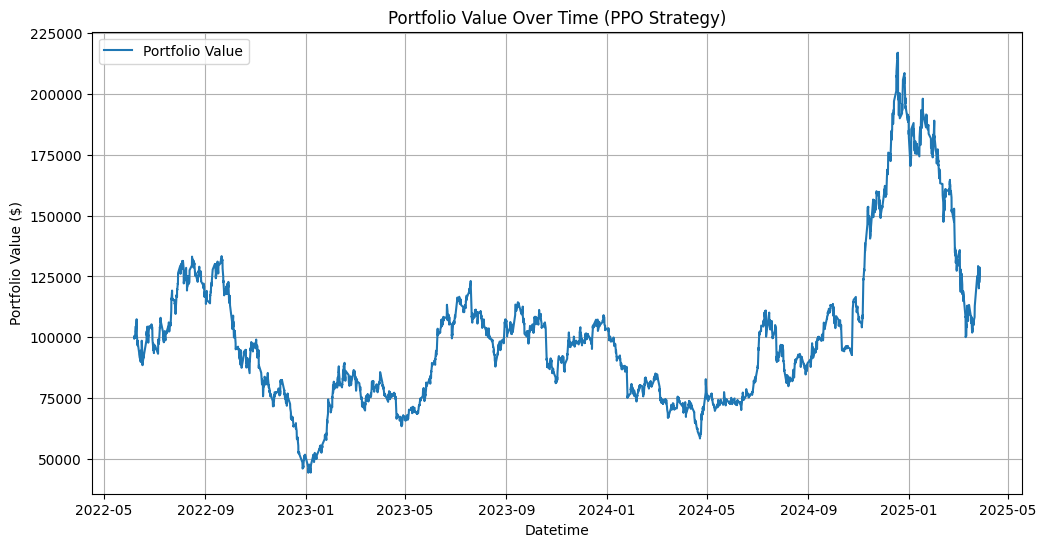


PPO Strategy Performance Metrics
-------------------------------------------
Cumulative Return: 22.90%
Sharpe Ratio: 0.16
Max Drawdown: 66.72%

Sample Trade Results:
Price                  Datetime       Close PPO_Action  Portfolio_Value
99    2022-06-06 14:30:00+00:00  236.900009        BUY    100000.000000
100   2022-06-06 15:30:00+00:00  235.559998       HOLD     99434.355616
101   2022-06-06 16:30:00+00:00  236.849991       HOLD     99978.886320
102   2022-06-06 17:30:00+00:00  237.866440       HOLD    100407.948766
103   2022-06-06 18:30:00+00:00  237.187500       HOLD    100121.355354
104   2022-06-06 19:30:00+00:00  238.333328       HOLD    100605.031252
105   2022-06-07 13:30:00+00:00  236.493332       HOLD     99828.333799
106   2022-06-07 14:30:00+00:00  236.153336       HOLD     99684.814878
107   2022-06-07 15:30:00+00:00  236.739990       HOLD     99932.452970
108   2022-06-07 16:30:00+00:00  238.266541       HOLD    100576.838885


In [29]:
#Step 7: Evaluate PPO Strategy and Compute Portfolio Metrics

initial_balance = 100000
balance = initial_balance
position = 0
portfolio_values = []
actions = []

obs = env.reset()

for i in range(len(df) - frame_bound[0]):
    action, _states = ppo_model.predict(obs)
    current_price = df['Close'].iloc[i + frame_bound[0]]

    if action[0] == 1 and position == 0:  # BUY action
        position = balance / current_price
        balance = 0
        actions.append('BUY')

    elif action[0] == 0 and position > 0:  # SELL action
        balance = position * current_price
        position = 0
        actions.append('SELL')

    else:
        actions.append('HOLD')

    total_value = balance + position * current_price
    portfolio_values.append(total_value)

    obs, rewards, done, info = env.step(action)

#Create Trade Results DataFrame
df_trade = df.iloc[frame_bound[0]:].copy()
df_trade['PPO_Action'] = actions
df_trade['Portfolio_Value'] = portfolio_values

#Calculate Performance Metrics
df_trade['Daily_Return'] = df_trade['Portfolio_Value'].pct_change().fillna(0)

ppo_cumulative_return = (df_trade['Portfolio_Value'].iloc[-1] / initial_balance - 1) * 100
ppo_sharpe_ratio = (df_trade['Daily_Return'].mean() / df_trade['Daily_Return'].std()) * np.sqrt(252) if df_trade['Daily_Return'].std() != 0 else 0
ppo_max_drawdown = ((df_trade['Portfolio_Value'].cummax() - df_trade['Portfolio_Value']) / df_trade['Portfolio_Value'].cummax()).max() * 100

#Plot Portfolio Value Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_trade['Datetime'], df_trade['Portfolio_Value'], label='Portfolio Value')
plt.xlabel('Datetime')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time (PPO Strategy)')
plt.legend()
plt.grid()
plt.show()

#Display Summary Metrics
print("\nPPO Strategy Performance Metrics")
print("-------------------------------------------")
print(f"Cumulative Return: {ppo_cumulative_return:.2f}%")
print(f"Sharpe Ratio: {ppo_sharpe_ratio:.2f}")
print(f"Max Drawdown: {ppo_max_drawdown:.2f}%")

#Display brief trade results
print("\nSample Trade Results:")
print(df_trade[['Datetime', 'Close', 'PPO_Action', 'Portfolio_Value']].head(10))
